In [1]:
# Imports from python packages
import sys
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

# Imports from my packages (see the folder called utils)
sys.path.append('../../utils/')
from SeltzerBerger import get_data_SB

# Style of the plot
plt.style.use('../../utils/minimal.style')

In [2]:
# Physical parameters
Z = 47
T1 = 10.0 # MeV

In [3]:
# Read the data : k d\sigma / dk
axis_T1, axis_k, kds_dk, phi = get_data_SB(Z)
index = abs(axis_T1-T1).argmin()
M, N = len(axis_T1), len(axis_k)

In [4]:
# Deduce d\sigma / dk
ds_dk = np.zeros([M,N-1])
for i in range(M):
    ds_dk[i,:] = kds_dk[i,1:] / axis_k[1:]

In [5]:
# Fit kds_dk
xdata = axis_k
ydata = kds_dk[index,:]

degree = 4
poly = Polynomial.fit(xdata, ydata, deg=int(degree))
coefs = poly.convert().coef
kds_dk_fit = poly(xdata)

In [6]:
# Fit ds_dk
xdata = 1./axis_k[1:]
ydata = ds_dk[index,:]

degree = 4
poly = Polynomial.fit(xdata, ydata, deg=int(degree))
coefs = poly.convert().coef
ds_dk_fit = poly(xdata)

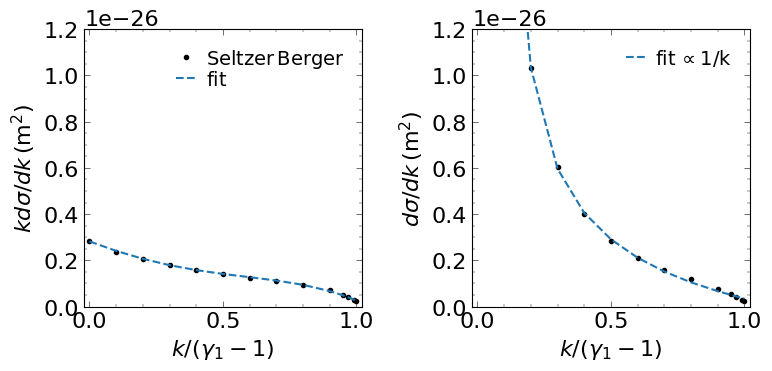

In [7]:
# Figure
fig, axs = plt.subplots(1, 2, figsize=(8,4))
ax0=axs[0]
ax0.plot(axis_k, kds_dk[index,:], ls='', marker='o', c='k', label=r"$ \rm Seltzer \, \rm Berger $")
ax0.plot(axis_k, kds_dk_fit, ls='--', label=r'$ \rm fit $')
ax0.set_xlabel(r"$ k/(\gamma_1 - 1) $")
ax0.set_xlim([-0.02, 1.02])
ax0.set_ylabel(r"$ kd\sigma/dk \, \rm (m^2) $")
ax0.set_ylim([0., 1.2e-26])
ax0.legend(loc='best', ncol=1)
ax1=axs[1]
ax1.plot(axis_k[1:], ds_dk[index,:], ls='', marker='o', c='k')
ax1.plot(axis_k[1:],ds_dk_fit, ls='--', label=r"$ \rm fit \, \propto 1/k$")
ax1.set_xlabel(r"$ k/(\gamma_1 - 1) $")
ax1.set_xlim([-0.02, 1.02])
ax1.set_ylabel(r"$ d\sigma/dk \, \rm (m^2) $")
ax1.set_ylim([0., 1.2e-26])
ax1.legend(loc='best', ncol=1)
plt.tight_layout()
plt.show()